<center> <h2> DS 3000 - Summer 2021</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Online Shopping Prediction</h3> </center>
<center><h4>Rida Sharief, Neha Simon, Lucy Marnell</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

## **Executive Summary**:

Given today’s digital state, it is no surprise that there has been an increase in e-commerce operations. Additionally, after COVID-19, shoppers have become increasingly accustomed to the benefits of being able to browse and make purchases from the comfort and safety of their own homes. Thus, businesses must adapt to this computerized system.

Our goal was to build a classification model that predicts whether a user will purchase something off an online site given a range of features that characterize their actions. We implemented the K-Nearest neighbor, Support Vector Machine, and Gaussian Naive Bayes classification algorithms, used iterative feature selection to choose the most important features, and Grid Search to tune our parameters of the best performing algorithms.

Our dataset consisted of 17 feature variable columns detailing a user's visit to an e-commerce site and our target variable represented whether that user provided revenue from the site.

Before starting on our analysis, we standardized our data and employed downsampling due to the original imbalance in the dataset. We created various visualizations such as a heat map and bar graph to see the correlation between select features and the target variable.

---



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## **1. INTRODUCTION**

**Problem Statement**

We have decided to explore a classification problem under the topic of E-commerce success indicators. More specifically, we are training a model to predict whether a user on an E-commerce site will purchase off the site, represented as true or false in our data, for an online shopping service based on the various related feature column values. Based on the support of data analysis, we want to learn what factors are most indicative of a website user’s intention to actually make a purchase rather than just browsing.


**Significance of the Problem**

Due to the increasing proportion of companies' sales and revenue e-commerce accounts for, it is important for these companies to understand what makes a user more likely to be a source of revenue for a company. Insights from this project could be used to better understand which individuals will be customers vs. just visitors of their website and therefore businesses can use this information to efficiently use their resources when it comes to advertising and other marketing efforts, as well as optimization of their e-commerce platform's structure.


**Previous Work on the Topic**

The first report came from a 2018 master's thesis from the University of Twente (Netherlands) (Seippel 2018) which studied the application of machine learning to a similar online shopping dataset from a German clothing company. The dataset collected many attributes for each website visitor, including session-specific data like the day, time spent on a page, price in shopping cart, etc. and user-specific data about past shopping history like number of past orders, length of time as a customer, etc. ML algorithms including random forest, boosted tree, support vector machine, neural network, and logistic regression methods were applied to predict whether a customer will make a purchase based on these features. Results showed that the random forest algorithm had the best performance based on accuracy, efficiency, resiliency and understandibility. The SVM algorithm performs with very low accuracy for some subsets of the data, but this is thought to be caused by imbalanced data in these cases. When trained on balanced data, the algorithm performs significantly better. 

The second report we looked at used the same dataset as ours (Sakar et al, 2019). The researchers conducted shopper behavior analysis system in order to predict purchase intent. By focusing on a user's pageview, session, and user information, they constructed a classification algorithm using random forest, support vector machines, which we will also employ, and multilayer perceptron classifiers. Whereas we plan on using downsampling, they used oversampling. They also used feature selection as we will. The results show that MLP calculated using resilient backpropagation algorithm with weight backtracking produces a significantly higher accuracy and F1 Score than RF and SVM, meaning that using SVM as a classifier may not produce the strongest classifier possible. They also found that the accuracy of the classifier is highest when clickstream data obtained from the navigation path followed during the online visit is combined with session information-based features, so we should try to have a balance of those features in our model. 

**References:**
Seippel H. S. (2018). Customer purchase prediction through machine learning(Publication No. 196122994) [Master’s thesis, University of Twente]. Semantic Scholar.

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0

**Questions**
        
Based on the problem we have decided to focus on and the data analysis techniques we plan to implement, we would like to answer the following questions:

1. Will reducing the number of features produce better predictions than using all 17 of the original feature columns?
2. Which feature(s) are the most informative for the classification algorithm? In other words, what is the biggest indicator that a user will purchase something off a site?
3. Will there be a significant differance in the accuracy of the three chosen classification algorithms?
4. Which classification machine learning algorithm is the most accurate in predicting whether a website user makes a purchase?

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## **2. METHOD**

## **2.1. Data Acquisition**

The dataset we used is titled "Online Shoppers Intention". It was obtained from Kaggle and is also available on the UCI machine learning repository. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Our dataset also has 12,330 samples or rows. Of these samples, 84.5% were negative class samples that did not end with revenue, and 15.5% were positive class samples. The dataset contains 17 feature variables related to a user’s visit to an e-commerce website with the outcome column being if they purchased something from the site. 

**Description of variables:**

**Feature Variables:**

- Administrative: Quantity of administrative pages that the user visited.
- Administrative_Duration: How long the user spent on administrative pages.
- Informational: Quantity of informational pages that the user visited.
- Informational_Duration: How long the user spent on informational pages.
- ProductRelated: Quantity of pages related to products that the user visited.
- ProductRelated_Duration: How long the user spent on pages related to products.
- BounceRates: Percentage of users who enter and exit the site on the same page without interacting.
- ExitRates: The percentage of page views for a specific page that result in the user exiting the site.
- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction
- SpecialDay: The proximity of the date of this user session to a holiday, scaled to range between 0 (far from a holiday) to 1 (on a holiday).
- Month: A String representing the month of this user session.
- OperatingSystems: An integer representing what operating system is being used.
- Browser: An integer representing what browser is being used.
- Region: An integer representing what region the user is conducting this session from.
- TrafficType: An integer used to categorize where this user is coming from (i.e. from a direct search, social media, etc.)
- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- Weekend: A boolean representing whether the session takes place on a weekend or weekday (true = weekend, false = weekday).

**Target Variable:**
- Revenue: A boolean representing whether the user made a purchase or left the site without making a purchase (true = purchase, false = no purchase).

**Data source on Kaggle:**

Sue, H. (2020, January 15). Online Shoppers Intention UCI Machine Learning. Kaggle. https://www.kaggle.com/henrysue/online-shoppers-intention.






In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ridasharief/DS-3000/main/online_shoppers_intention.csv'
data = pd.read_csv(url)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## **2.2. Data Analysis**

**Predictive Model:**

We are going to construct a model to predict whether a user will end up making a purchase and provide revenue on a website based on attributes related to the user and their actions during their session using the website. We will start off by constructing a model using all 17 features and then use iterative feature selection to see if model performance can improve when only using the top 5 features.

**A Supervised Learning Problem:**

This is a supervised learning problem as we will use the percentage split method to train our model, followed by validation and testing. The sub-category of this model is classification.

**Machine Learning Algorithms to be Applied:**

We will implement the K nearest neighbor, Support Vector Machine, and Gaussian Naive Bayes classification algorithms. We have chosen to use kNN as it is a non-parametric algorithm and is appropriate for classification models. We are using SVM as it is a memory efficient classification algorithm. We are using Gaussian Naive Bayes as it is well suited for categorical input variables and only requires finding the mean and standard deviation of the points within each label. We have chosen to use these as these are three popular algorithms used for classification models, and we wanted to see how our model would work with all three implementations since each algorithms operates in a different fashion.




<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## **3. RESULTS**

### **3.1. Data Wrangling**

#### **Simple Data Cleaning**

In order to clean the data, we will be dropping rows with empty values.

In [ ]:
import numpy as np

# Drop rows with empty values, if any
data = data.dropna()
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### **Perform data wrangling**

We will rename the target column from 'revenue' to 'target'.

In [ ]:
# Rename target column
data = data.rename({'Revenue' : 'target'}, axis=1)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### **Preprocess variables**

We will preprocess the variables by transforming categorical values into numerical values when appropriate. We will then downsample our data to account for the great imbalance in our original dataset. To do this, we will randomly select 1500 rows with a postive target value, meaning the customer did make a purchase, and 1500 rows with a negative target value for a total of 3000 rows. Finally, we will standardize the data using StandardScaler so that it is normally distributed.

In [ ]:
# Month column
month_dict = {'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
data['Month'] = data['Month'].map(month_dict)

# Visitor_type
visitor_dict = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}
data['VisitorType'] = data['VisitorType'].map(visitor_dict)

# Weekend
weekend_dict = {False:0, True:1}
data['Weekend'] = data['Weekend'].map(weekend_dict)

# Target
target_dict = {False:0, True:1}
data['target'] = data['target'].map(target_dict)
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [ ]:
# Downsampling the data to balance our dataset 
balanced_data = data.groupby('target').apply(lambda x: x.sample(n=1500)).reset_index(drop = True)

In [ ]:
# Standardized data
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(balanced_data.drop('target', axis = 1)) 
scaled_features = scaler.transform(balanced_data.drop('target', axis = 1))
balanced_data.head()
 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,2,86.000000,0,0.000000,18,754.916667,0.000000,0.005556,0.000000,0.0,5,3,2,6,2,1,0,0
1,1,35.750000,0,0.000000,7,1173.000000,0.000000,0.028571,76.780941,0.0,11,2,4,9,2,0,0,0
2,12,1449.666667,4,559.083333,127,4876.007712,0.005755,0.029203,5.751219,0.0,11,2,2,1,2,0,0,0
3,0,0.000000,0,0.000000,7,220.333333,0.000000,0.010000,0.000000,0.0,5,2,2,1,5,1,0,0
4,1,129.360000,0,0.000000,6,341.360000,0.000000,0.062500,11.275465,0.0,11,2,5,3,1,0,0,0


** **Iterative feature selection will be perfomed in section 3.3**

## **3.2. Data Exploration**


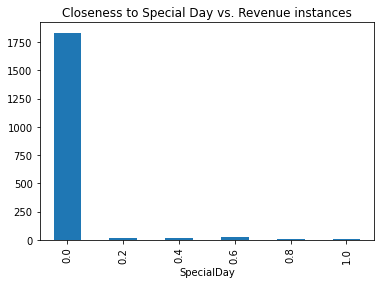

In [ ]:
# Bar Graph
# Github link to bar graph- https://github.com/ridasharief/DS-3000/blob/main/Graph1.png
import matplotlib.pyplot as plt
import seaborn as sns

data.groupby(['SpecialDay'])['target'].sum().plot(kind='bar')
plt.title("Closeness to Special Day vs. Revenue instances")
plt.rcParams["figure.figsize"] = (15, 10)

**Visual Interpretation:**

The bar graph above shows the relationship between the proximity to a holiday and the number of purchases completed. The proximity to a holiday variable has been previously scaled by the dataset creator to fit a 0 to 1 range, with 0 being the farthest from a holiday and 1 being on a holiday. We expected to see that the number of purchases would increase as dates grew closer to a special day. However, the graph shows that the large majority of transactions took place on days that were farthest from holidays. This may be a result of the fact that there are far fewer days which are holidays when compared to those that are not, as well as the fact that people do not want to spend too much of their time around holiday seasons involved in shopping.

Excluding the transactions on days with a proximity of 0, the number of revenue instances increases until it peaks at a proximity of 0.6 then
decreases as the proximity approaches 1. We expected to see a positive increase as proximity increased, but the absence of a positive
increase could be explained by how proximity is calculated. For example, many transactions might take place in the days leading
up to Christmas, but very few might take place on Christmas itself and the days following. However, the days right before and after a
holiday have similar proximities, so they could average out to a lower average number of revenue instances.

While this graph does not show a strong relationship between closeness to special days and the target variable, we chose to include it
because the visualization subverted our expectations and caused us to think more about our data and how our feature variables were calculated.


Text(0.5, 1.0, 'Online Shoppers Intention Heat Map')

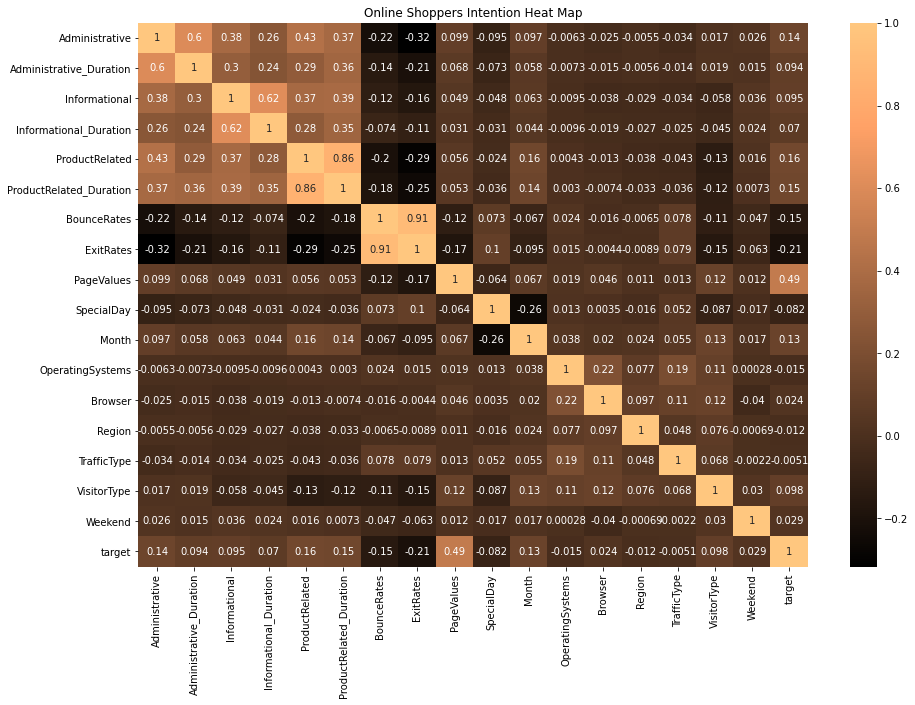

In [ ]:
# Heat 
# Github link to heatmap- https://github.com/ridasharief/DS-3000/blob/main/heatmap.png

import scipy.stats as stats

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True,cmap="copper").set_title('Online Shoppers Intention Heat Map')


**Visual Interpretation:**

When looking at the heat map, we wanted to analyze which features had the strongest correlation both with other features and with the target variable. 

One of the main observations we had was that the features that had the strongest correlation with each other were Administrative and Administrative_Duration (0.6), Informational and Informational_Duration (0.62), and ProductRelated and ProductRelated_Duration (0.86). We are hypothesizing that this is the case as the first column represents the number of pages of a given type a user visits while the duration column represents the amount of time spent on the respective type of page, so it is natural to assume that the more pages a user views, the more amount of time they will need to view them.

The top five features when measuring the correlation with the target variable appeared to be PageValues with an r-value of .49 (far stronger than the rest), ExitRates which had a negative correlation (-.21), the ProductRelated column (.16), ProductRelated_Duration column (.15), and finally BounceRates, which also had a negative correlation (-.15). It makes sense that exit rates and bounce rates have a negative correlation as these features represent attributes related to the user leaving the e-commerce platform. We are expecting to see at least a few, if not all, of these columns will be chosen when using iterative feature selection in future analysis.

Text(0.5, 1.0, 'Month vs. Revenue instances')

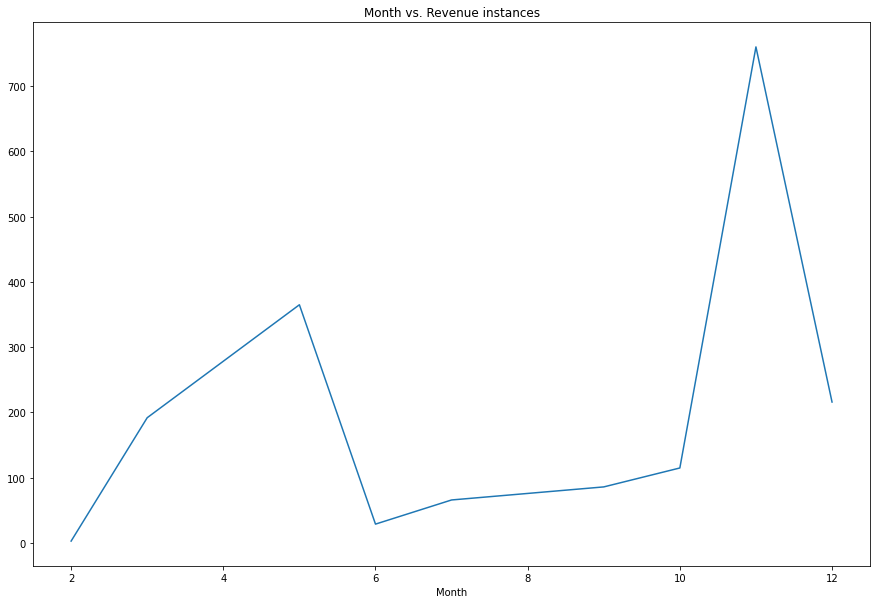

In [ ]:
# Line Graph
# Github link to line graph- https://github.com/ridasharief/DS-3000/blob/main/MvsRev.png

data.groupby(['Month'])['target'].sum().plot(kind='line')
plt.title('Month vs. Revenue instances')

**Visual Interpretation:**

We created this line graph so we could see if there was a clear relationship between the month and the number of purchases made. We were especially interested in whether certain seasons saw peaks or lows compared to others. Overall we see months at the beginning and end of the year, with the exception of February, show a greater number of revenue instances, while months between June and October account for a lower proprtion of the sales.

 As shown by the visualization below, November sees 
the highest instances of purchases compared to any other month, while Feburary has the lowest. Perhaps the upcoming holiday season can explain 
why revenue in November is so much higher. May sees the second highest peak, this could be because of Mother's day or could be because of the season 
of Spring/Summer. 

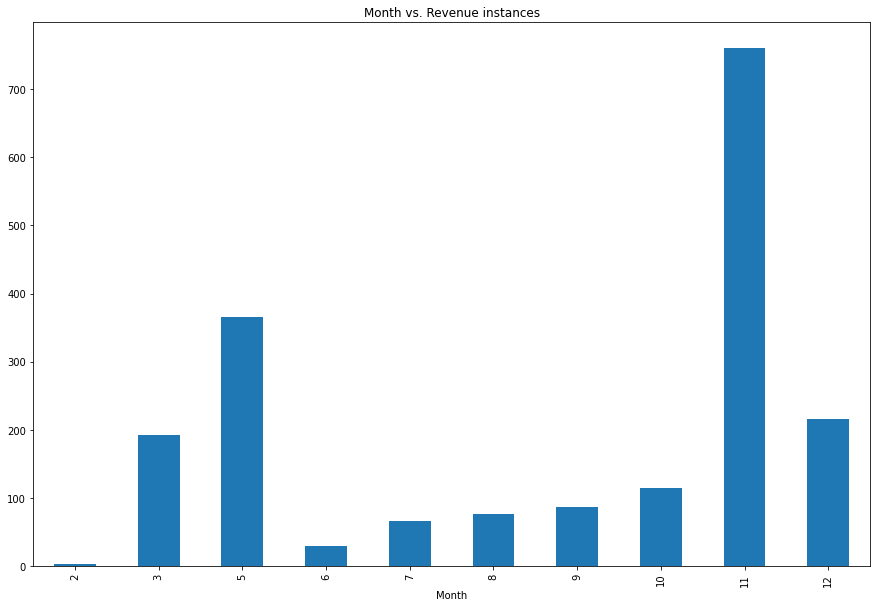

In [ ]:
# Bar Graph
# Github link to bar graph- https://github.com/ridasharief/DS-3000/blob/main/MvsRevBar.png

plot = data.groupby(['Month'])['target'].sum().plot(kind='bar')
plt.title("Month vs. Revenue instances")
plt.rcParams["figure.figsize"] = (15, 10)

**Visual Interpretation:**

Just as in the previous visualization, this bar graph shows the correlation between month and revenue. The analysis for what is shown here would be the same as what was interpreted for the line graph, and one can more clearly see revenue instances per month as separated groupings.

It is important to note that when looking at this bar graph, we noticed that there are no values for the months of January and April. The original source of this dataset does not explicitly state whether this is a result of them failing to collect data for those months or simply due to a lack of purchases being made.


## **3.3. Model Training**

### **Appling machine learning algorithms- kNN, SVM, Gaussian Naive Bayes**

In [ ]:
# Define feature and target columns 

features = scaled_features
target = balanced_data['target']

In [ ]:
features

array([[-2.15761240e-01, -6.26482526e-02, -4.53122709e-01, ...,
        -5.03999468e-01,  1.97071619e+00, -5.76837069e-01],
       [-5.00908253e-01, -3.36449270e-01, -4.53122709e-01, ...,
        -5.03999468e-01, -4.65274157e-01, -5.76837069e-01],
       [ 2.63570889e+00,  7.36766659e+00,  2.43147809e+00, ...,
        -5.03999468e-01, -4.65274157e-01, -5.76837069e-01],
       ...,
       [ 2.06541486e+00,  1.07992778e+00, -4.53122709e-01, ...,
        -1.17326115e-03, -4.65274157e-01,  1.73359178e+00],
       [-2.15761240e-01, -3.51433405e-01, -4.53122709e-01, ...,
        -7.55412571e-01, -4.65274157e-01, -5.76837069e-01],
       [ 6.39679799e-01,  1.02963683e+00,  2.68027491e-01, ...,
         1.50730536e+00, -4.65274157e-01, -5.76837069e-01]])

In [ ]:
target

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: target, Length: 3000, dtype: int64

In [ ]:
# Define a dictionary of estimators so they can be applied in an iteration statement

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000),
    'Gaussian Naive Bayes': GaussianNB()}

In [ ]:
estimators.values()

dict_values([KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0), GaussianNB(priors=None, var_smoothing=1e-09)])

In [ ]:
 # Split dataset into testing and training set
 
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 3000)

In [ ]:
# Perform percentage-split to identify the best performing algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def classifiers_percentage_split():

  print("Classification reports for algorithms with all features: \n")
  
  for estimator_name, estimator_object in estimators.items():

        scores = estimator_object.fit(X=X_train, y=y_train)

        # Make predictions on the test set
        predicted = estimator_object.predict(X=X_test)
        expected = y_test

        # Report prediction accuracy
        class_report = classification_report(y_true=expected, y_pred=predicted)
    
        print(estimator_name + ": \n\t" + f'Classification accuracy on the training data:={scores.score(X_train, y_train):.2%} ')
        print("\t"+ f'Classification accuracy on the test data:={scores.score(X_test, y_test):.2%} ' +"\n")
        print(class_report)

In [ ]:
classifiers_percentage_split()

Classification reports for algorithms with all features: 

k-Nearest Neighbor: 
	Classification accuracy on the training data:=82.13% 
	Classification accuracy on the test data:=71.87% 

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       367
           1       0.73      0.72      0.72       383

    accuracy                           0.72       750
   macro avg       0.72      0.72      0.72       750
weighted avg       0.72      0.72      0.72       750

Support Vector Machine: 
	Classification accuracy on the training data:=79.64% 
	Classification accuracy on the test data:=81.07% 

              precision    recall  f1-score   support

           0       0.76      0.91      0.82       367
           1       0.89      0.72      0.79       383

    accuracy                           0.81       750
   macro avg       0.82      0.81      0.81       750
weighted avg       0.82      0.81      0.81       750

Gaussian Naive Bayes: 
	Cla

In [ ]:
# Iterative Feature Selection

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

def feature_selection():

  # Create the RFE object and compute a cross-validation score
  rfe = RFE(estimator=DecisionTreeClassifier(),  n_features_to_select = 5)
  rfe.fit(X_train, y_train)

  # Transform training and testing sets so only the selected features are retained
  X_train_selected = rfe.transform(X_train)
  X_test_selected = rfe.transform(X_test)

  # Return the selected features
  print("Optimal number of features : %d" % rfe.n_features_)
  print("Selected features after RFE:")
  selected = []
  for i, feature in zip(rfe.get_support(), data.columns):
    if i == True:
      selected.append(feature)
  print(selected)
  return(X_train_selected, X_test_selected, selected)


In [ ]:
X_train_selected, X_test_selected, selected = feature_selection()

Optimal number of features : 5
Selected features after RFE:
['Administrative_Duration', 'ProductRelated_Duration', 'ExitRates', 'PageValues', 'Month']


In [ ]:
# Create dataframe with only selected columns

selected_dataset = balanced_data[selected].copy()
selected_dataset

,Administrative_Duration,ProductRelated_Duration,ExitRates,PageValues,Month
0,86.000000,754.916667,0.005556,0.000000,5
1,35.750000,1173.000000,0.028571,76.780941,11
2,1449.666667,4876.007712,0.029203,5.751219,11
3,0.000000,220.333333,0.010000,0.000000,5
4,129.360000,341.360000,0.062500,11.275465,11
...,...,...,...,...,...
2995,82.200000,5505.401209,0.005810,10.594232,11
2996,195.000000,3408.266667,0.027557,9.594847,11
2997,295.694056,785.474359,0.001481,34.991667,5
2998,33.000000,1720.000000,0.007692,60.290184,3


In [ ]:
#  Apply model on only selected features 

def selected_classifiers_percentage_split():

  print("Classification reports for algorithms with selected features: \n")

  for estimator_name, estimator_object in estimators.items():
        
        scores = estimator_object.fit(X=X_train_selected, y=y_train)
        
        # Make predictions on the test set
        predicted = estimator_object.predict(X=X_test_selected)
        expected = y_test

        # Report prediction accuracy
        class_report = classification_report(y_true=expected, y_pred=predicted)
        print(estimator_name + ": \n\t" + f'Classification accuracy on the training data:={scores.score(X_train_selected, y_train):.2%} ')
        print("\t"+ f'Classification accuracy on the test data:={scores.score(X_test_selected, y_test):.2%} ' +"\n")
        print(class_report)

In [ ]:
selected_classifiers_percentage_split()

Classification reports for algorithms with selected features: 

k-Nearest Neighbor: 
	Classification accuracy on the training data:=84.62% 
	Classification accuracy on the test data:=80.13% 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       367
           1       0.81      0.79      0.80       383

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.80       750
weighted avg       0.80      0.80      0.80       750

Support Vector Machine: 
	Classification accuracy on the training data:=80.09% 
	Classification accuracy on the test data:=81.60% 

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       367
           1       0.90      0.72      0.80       383

    accuracy                           0.82       750
   macro avg       0.83      0.82      0.81       750
weighted avg       0.83      0.82      0.81       750

Gaussian Naive Bayes: 

**Results:**

In classification models, precision represents the number of true positives divided by the total number of true positives and false positives for a given class. When looking at the precision for the model with all features, the weighted average precision for SVM outperformed the other algorithms with a precision of 82% vs. 72% for kNN and 74% for GaussianNB. This result holds true when looking at the results for the selected feature columns. SVM has the highest average weighted precision of 83% vs. 80% for kNN and 78% for GaussianNB. Additionally, it can be seen that the level of precision increased for all three algorithms when feature selection was employed.

Accuracy represents the proportion of total predictions that actually end up being correct. When looking at the algorithms trained on all features, the KNN algorithm shows signs of overfitting because it displays a training set accuracy of ~81% and a much lower testing set accuracy of ~72%. However, when looking at the other two algorithms, SVM and Gaussian Naive Bayes, the difference in accuracy when trained on all features appears to be less significant between the training and testing data.

When looking at just the selected features, all algorithms performed with improved accuracy on the testing data. Both SVM and Gaussian Naive Bayes performed slightly better on testing set data than training, while KNN performed significantly worse on testing data. However, the gap between training and testing set accuracy for KNN decreased from ~10% to ~5%, indicating an improvement in the overfitting issue.

Out of all three algorithms, the SVM algorithm had the highest testing set accuracy when trained on all features or on just the selected features. The KNN algorithm had the second highest testing set accuracy when trained on the selected features. And finally when looking at the weighted average precision, SVM was the most precise, followed by KNN. Therefore, we will employ hyperparameter tuning on both to see if their accuracy rates could improve further.

### **3.4. Model Optimization**


In [ ]:
# GridSearchCV on SVM and KNN algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Tuning to determine best C value for the SVM algorithm
parametersSVM = {'C': [1, 10, 100, 1000]}

# Fitting GridSearch on the training data for SVM
grid_SVM = GridSearchCV(SVC(), parametersSVM, cv=5)
grid_SVM.fit(X=X_train_selected, y=y_train)

print("GridSearch on Support Vector Machine Algorithm:")
print("Best parameter value: ", grid_SVM.best_params_)
print("Best cross-validation score: ", grid_SVM.best_score_)
print("Training set score with best parameters:", grid_SVM.score(X_train_selected, y_train))
print("Testing set score with best parameters:", grid_SVM.score(X_test_selected, y_test))


# Tuning to determine best k value for the KNN algorithm
parametersKNN = {"n_neighbors":[1, 5, 10, 20, 30, 40, 50]}

# Fitting GridSearch on the training data for KNN
grid_KNN = GridSearchCV(KNeighborsClassifier(), parametersKNN, cv=5)
grid_KNN.fit(X=X_train_selected, y=y_train)

print("\nGridSearch on K Nearest Neighbors Algorithm:")
print("Best parameter value: ", grid_KNN.best_params_)
print("Best cross-validation score:  ", grid_KNN.best_score_)
print("Training set score with best parameters:", grid_KNN.score(X_train_selected, y_train))
print("Testing set score with best parameters:", grid_KNN.score(X_test_selected, y_test))



GridSearch on Support Vector Machine Algorithm:
Best parameter value:  {'C': 10}
Best cross-validation score:  0.8177777777777777
Training set score with best parameters: 0.8373333333333334
Testing set score with best parameters: 0.8293333333333334

GridSearch on K Nearest Neighbors Algorithm:
Best parameter value:  {'n_neighbors': 5}
Best cross-validation score:   0.7946666666666667
Training set score with best parameters: 0.8462222222222222
Testing set score with best parameters: 0.8013333333333333


**Results:**

The SVM model performed the best with percentage-split training in the previous section, therefore we chose to perform hyperparameter tuning on this algorithm first to see if its accuracy could be improved further. Changing the C value affects the regularization of the model, with a larger C value fitting the points in the training set more closely. As such, increasing the C value of the SVM model could lead to improved accuracy on the training and testing sets, but too large of a value could lead to overfitting and sacrifice testing set accuracy. According to the results of the GridSearch, the best value of C was 10.

We decided to tune the KNN algorithm as well to see if reducing the model's complexity would increase its testing set accuracy closer to its training set accuracy value. Increasing the value of k, or the number of nearest neighbors, decreases model complexity, so we focused on values of k that were the default value of 5 or larger. However, according to the GridSearch results, the best value of k was indeed 5, so the model did not need hyperparameter tuning.

When comparing the results of the two algorithms after GridSearch, SVM outperformed the KNN algorithm, with a slightly higher testing set. This shows how hyperparameter tuning can improve accuracy in an algorithm.

### **3.5. Model Testing**


In [ ]:
# Performing tuned SVM algorithm on testing set data
svc = SVC(C = 10)
scores = svc.fit(X=X_train_selected, y=y_train)

# Make predictions on the test set
predicted = svc.predict(X=X_test_selected)
expected = y_test

# Report prediction accuracy
class_report = classification_report(y_true=expected, y_pred=predicted)
print("Support Vector Machine Algorithm with Selected Features and Hyperparameter Tuning: \n\n\t" + f'Classification accuracy on the training data:={scores.score(X_train_selected, y_train):.2%} ')
print("\t"+ f'Classification accuracy on the test data:={scores.score(X_test_selected, y_test):.2%} ' +"\n")
print(class_report)

Support Vector Machine Algorithm with Selected Features and Hyperparameter Tuning: 

	Classification accuracy on the training data:=83.73% 
	Classification accuracy on the test data:=82.93% 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       367
           1       0.86      0.79      0.83       383

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## **4. DISCUSSION**

**Summary:**

We used data from an online shopping website collected over a period of one year providing session information including details about the date, length, and contents of each session and whether the session ended in a purchase. To preprocess our data, we cleaned our data, dropping empty values, scaled it using StandardScaler, split it into training and testing sets using the percentage-split approach.

We then fit the KNeighborsClassifier, SuppportVectorClassifier and Gaussian Naive Bayes algorithms to the training set and compared each model's performance. We evaluated performance using classification accuracy on the training and testing sets, as well metrics from each model's classification report, including precision, recall, f1-score, and support. After applying iterative feature selection, we retrained the three algorithms with the five most informative features of the dataset, as determined by recursive feature elimination. We used the same metrics to evaluate each model with only the selected features and found that the KNeighborsClassifier and SuppportVectorClassifier performed best. Finally, we applied GridSearchCV to tune these two algorithms, further improving the SVM model's performance.

**Interpretation:**
  
  We compared the K Nearest Neighbors, Support Vector Machines, Gaussian Naive Bayes algorithms.
  
  The SVM and KNN algorithms revealed the best performance with the selected features. The SVM algorithm with a C value of 10 had a classification accuracy of ~84% on the training set data and 83% on the testing set data.The KNN algorithm with a k value of 5 had a classification accuracy of ~85% on the training set data and ~80% on the testing set data.

  Due to the high testing set prediction accuracy and similar training set accuracy, the SVM algorithm trained on the selected features with a C value of 10 should be used for the predictive model.

  The tuned SVM algorithm performed with high accuracy of similar rates for both training and testing sets, indicating no problems of underfitting or overfitting. With an accuracy of ~83%, this model could be used to predict customers of an online shopping website because this type of classification is relatively low stakes compared to other tasks like medical diagnoses. While the algorithm is not perfect, predicting human behavior is variable and subjective, so an 83% success rate should be sufficient in providing valuable insights for ecommerce websites looking to best manage efforts such as advertisting and website optimization, among other tasks.


**Revisiting Initial Questions:**

  **Will reducing the number of features produce better predictions than using all 17 of the original feature columns?**

After performing iterative feature selection, we found that all three algorithms performed with higher accuracy for the testing data sets.

  **Which feature(s) are the most informative for the classification algorithm? In other words, what is the biggest indicator that a user will purchase something off a site?**
 
  According to the iterative feature selection results, the four most informative features in decreasing order of importance were PageValues, ProductRelated_Duration, ExitRates, Administrative_Duration, and ProductRelated. As predicted, these feature columns show overlap with the columns discussed in the interpretation of the heat map in the exploratory analysis.

  **Will there be a significant difference in the accuracy of the three chosen classification algorithms?**
 
  The range of prediction accuracy across all three algorithms before iterative feature selection ranged from ~74% to ~82% for the training set and ~72% to ~81% for the testing set. The range of prediction accuracy after iterative feature selection ranged from ~76% to ~85% for the training set and ~77% to ~82% for the testing set. For hyperparameter tuning, we only performed a GridSearch on our top two algorithms. The range of prediction accuracy after the GridSearchCV on KNN and SVM ranged from ~84% to ~85% for the training set and ~80% to ~83% for the testing set.

  **Which classification machine learning algorithm is the most accurate in predicting whether a website user makes a purchase?**
  
  The ML algorithm that was most accurate in predicting user purchases was the tuned SVM algorithm trained on the selected features.

**Conclusion:**
  
  While our exploration of different ML algorithms on this dataset led to a model with significantly improved accuracy, there are still opportunities for future exploration and improvement. The original dataset was imbalanced, so getting more data points for customers who make a purchase would increase our dataset size while maintaining balance. While this exploration was focused around classifying website visitors as customers or not, we could apply a regression algorithm on a similar dataset focusing on how much a user spends based on their activity on the website. This could still capture our original questions of whether or not someone will spend money, but with the added insight of how much they spend so that companies can create tiers of users. We also looked at a project on a similar dataset that had success with a random forest algorithm, so we could try training with this algorithm on our dataset to see if the random forest could reveal better performance than the SVM algorithm.




<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
We worked on this project synchronously through Zoom. As such, our three team members collaborated equally on all parts of the code, taking turns writing, researching, and editing.